In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data_df = pd.read_csv('train.csv')

In [3]:
raw_data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
raw_data_df.shape

(1460, 81)

# Exploratory Data Analysis & New Feature Creation

In [6]:
# Create a copy of original dataset to keep the original data intact

treated_data_df = raw_data_df.copy(deep=True)

In [7]:
# Divide columns into numerical and categorical

col_types = raw_data_df.dtypes

cat_col = col_types[col_types == 'object'].index.to_list()
num_col = col_types[~(col_types == 'object')].index.to_list()

In [8]:
# Take a look at all the numerical columns

raw_data_df[num_col]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


> * `['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']` these columns are years and hence can be converted to age for better understanding

In [9]:
# Create new column to signify the age of the columns that have years

for col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']:
    treated_data_df[f'Age_{col}'] = 2021 - raw_data_df[col]

In [10]:
treated_data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_YearBuilt,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,18,18,18.0,13
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,45,45,45.0,14
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,20,19,20.0,13
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,51,23.0,15
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,21,21,21.0,13


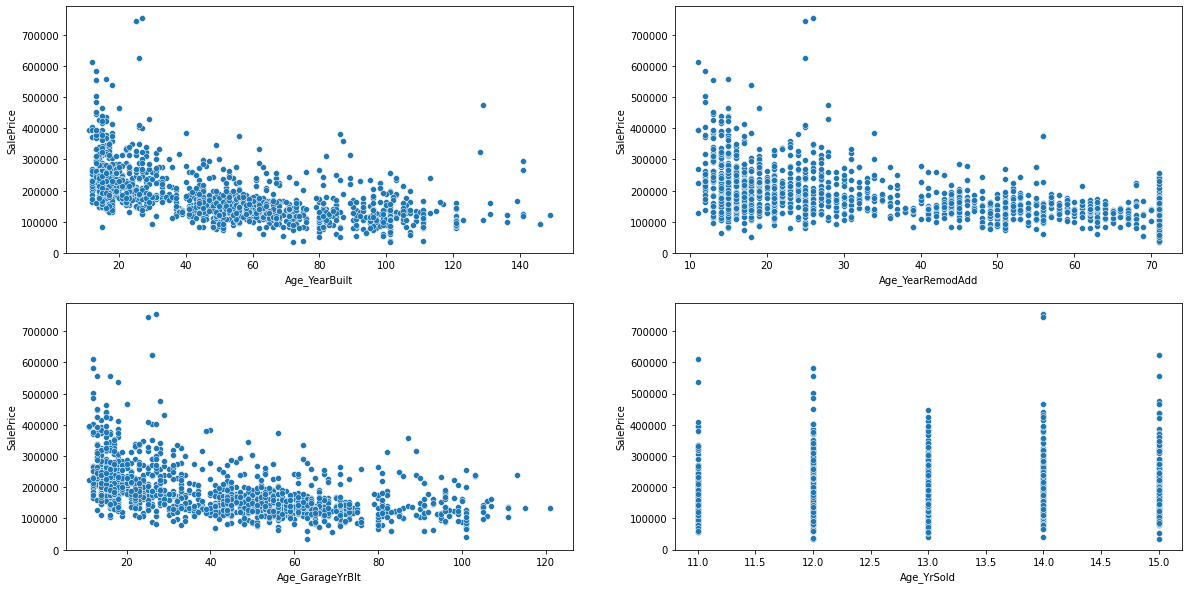

In [11]:
# Plot sale price against these age columns

plt.figure(figsize=(20,10))
           
for index, col in enumerate(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']):
    plt.subplot(2, 2, index + 1)
    sns.scatterplot(x=f'Age_{col}', y='SalePrice', data=treated_data_df)

plt.show()

> #### Observations
> * We can see a general trend of prices dropping as the age for the building, garrage and rennovation increases
> * Year sold has little to no effect on the price

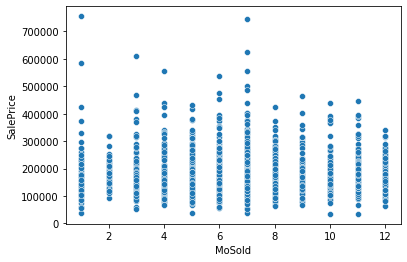

In [12]:
# Plot month sold against sale price

sns.scatterplot(x='MoSold', y='SalePrice', data=treated_data_df)
plt.show()

> #### Observations
> * The months januray and july see a hike in the prices

In [13]:
# Remove cols that are already analyzed

print(len(num_col))

for element in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold', 'Id']:
    num_col.remove(element)
    
print(len(num_col))

38
32


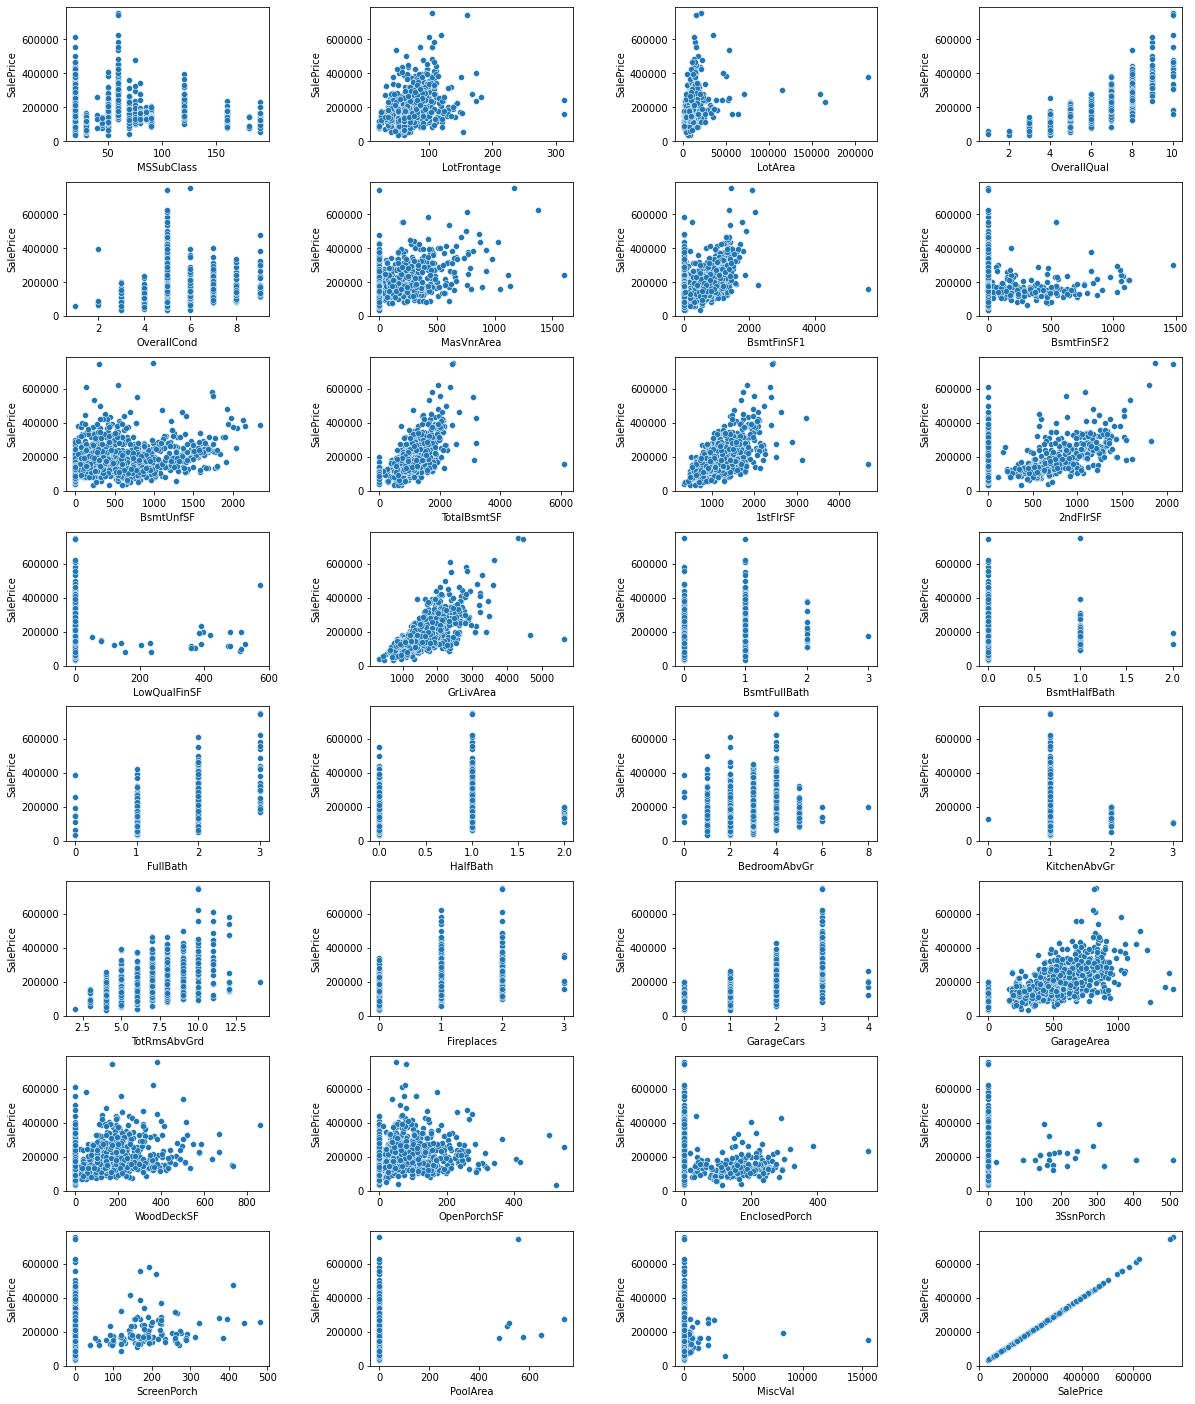

In [14]:

plt.figure(figsize=(20,25))

for index, col in enumerate(num_col):
    plt.subplot(8, 4, index+1)
    sns.scatterplot(x=col, y='SalePrice', data=treated_data_df)
    
plt.subplots_adjust(hspace=0.3, wspace=0.5)  
plt.show()

> Observations
> * We can see a lot of features have practically no effect on target varibale and some of them have positive realtion
> * `OverallQual`, `MasVnrArea`. `1stFlrSF`,`2ndFlrSF`, `GrLivArea`, `TotRmsAbvGrd`, , `GarageArea`, `WoodDeckSF` &
`OpenPorchSF` are some of the most strong predictors of the target variable.
> * Though we can see some of the features can be directly dropped we will keep them as we don't have the bussiness understanding at this point, will let the model decide on the importance and accordingly choose feautres

In [15]:
len(cat_col)

43

In [16]:
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
# We cannot possibly visualize all the variables in the list, so we will select prominent ones

viz_cat_col = ['Utilities', 'Neighborhood', 'HouseStyle', 'Foundation', 'Heating', 'PoolQC',
 'GarageCond', 'KitchenQual', 'RoofStyle' ]

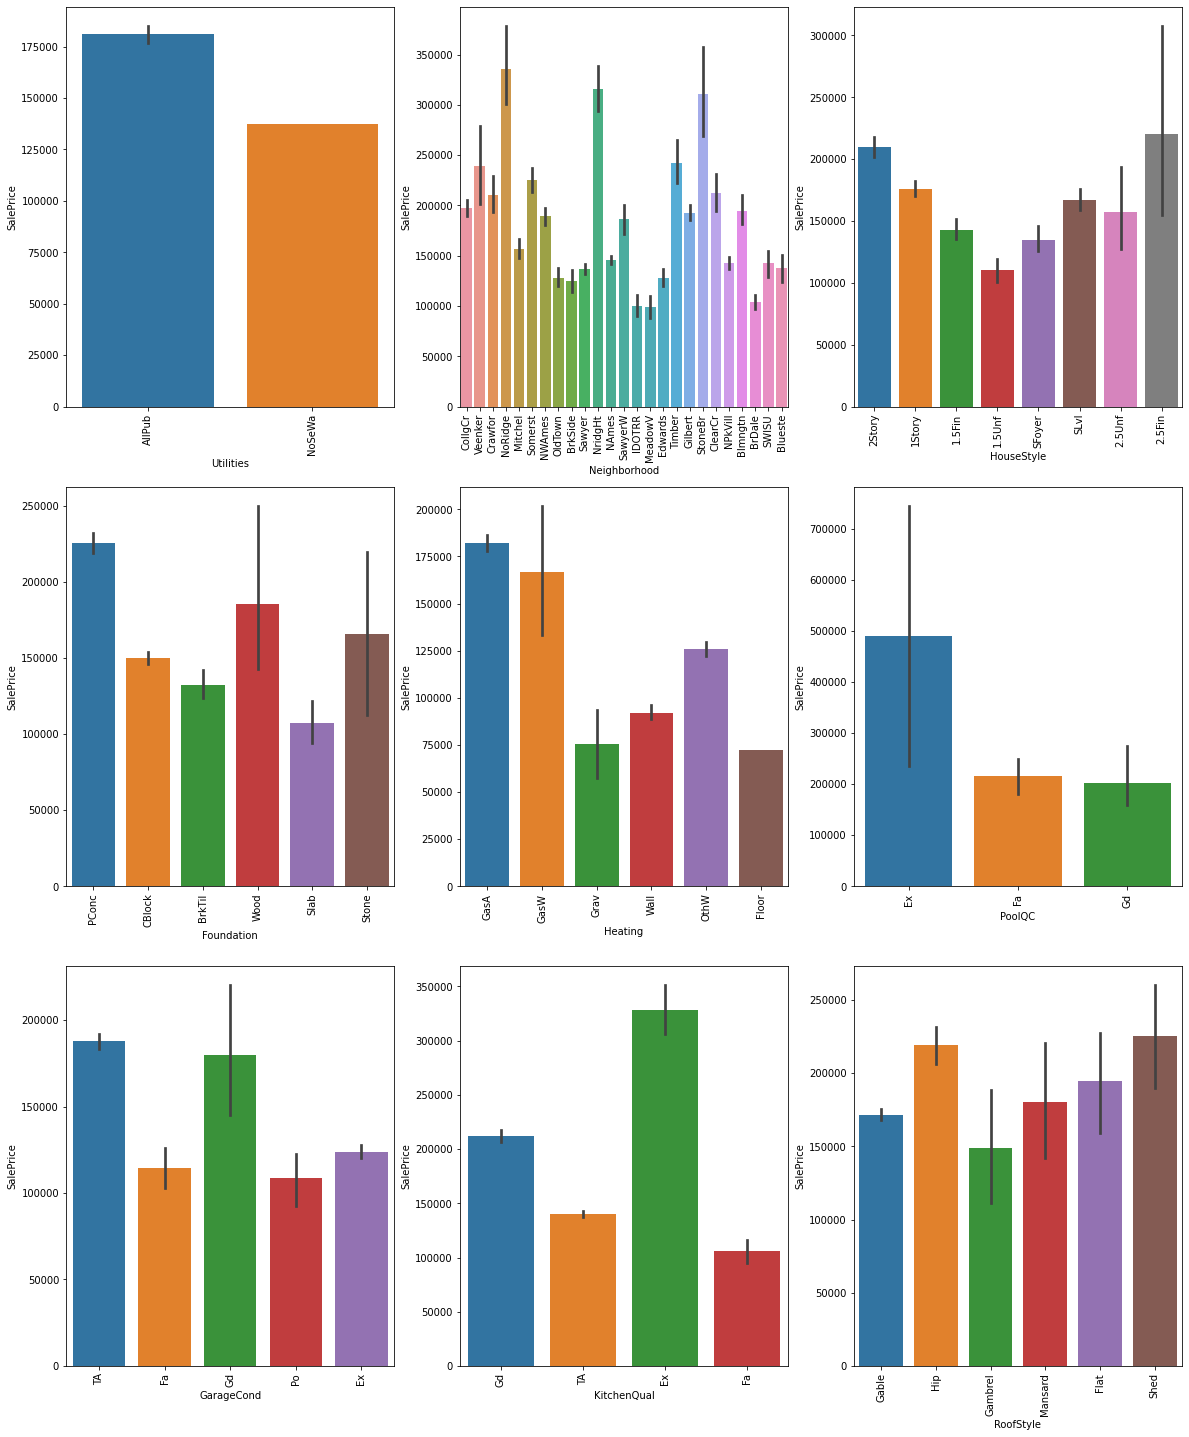

In [18]:

plt.figure(figsize=(20,25))

for index, col in enumerate(viz_cat_col):
    plt.subplot(3, 3, index+1)
    sns.barplot(x=col, y='SalePrice', data=treated_data_df)
    plt.xticks(rotation=90)
    
plt.show()
# sns.barplot(x='Utilities', y='SalePrice', data=treated_data_df)

> #### Observations
> * We can get a general understanding right away that houses with excelent quality of features are priced higher than their counter parts
> * If we take a closer look at the neighbhourhood feauture, we can observet that 'NoRidge', 'NridgHt' & 'StoneBr' stands out the most

## Correlation

In [19]:
# Correlation Matrix

corrmat = treated_data_df.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_YearBuilt,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.012713,0.021998,-0.000072,-0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.027850,-0.040581,-0.085072,0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.123349,-0.088866,-0.070250,-0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014228,-0.013788,0.024947,0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572323,-0.550684,-0.547766,0.027347
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.375983,-0.073741,0.324297,-0.043950
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-1.000000,-0.592855,-0.825667,0.013618
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.592855,-1.000000,-0.642277,-0.035743
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018

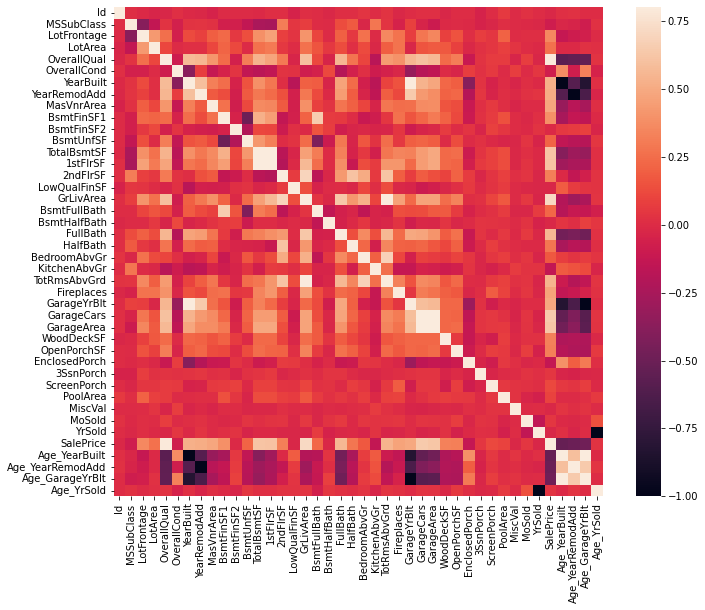

In [20]:
# Plot the heatmap

f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

> * As we have a lot of feautues it is really hard to analyse any useful information from the above heatmap so let's plot a heatmap with top 10 features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


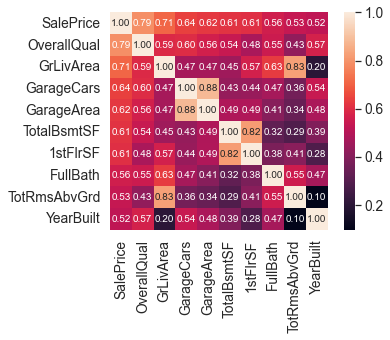

In [21]:
n = 10
cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
print(cols)

top_10_corrmat = np.corrcoef(treated_data_df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(top_10_corrmat, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Missing Value Treatment

In [22]:
missing_values = round(raw_data_df.isna().sum() / len(raw_data_df) * 100, 2)

In [23]:
missing_values[missing_values > 20].sort_values()

FireplaceQu    47.26
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64

> * We can directly remove feautres that are well above 50% but since we are handling dataset that is related to price of a house it will be a good idea to look through them first
> * We will quickly walk through the listed feature to check if they have relation to the target variable

> ### Checking FireplaceQu
> * NA value in this feature mean there is no fireplace in the house, so we will check if the NA value corrosponds to a 0 in Fireplaces feature
> * Also we will take a look at the target variable median values for NA and non-NA values

In [24]:
FireplaceQu_miss_index = raw_data_df[raw_data_df['FireplaceQu'].isna()].index

In [25]:
raw_data_df.iloc[FireplaceQu_miss_index]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [26]:
raw_data_df.iloc[FireplaceQu_miss_index]['SalePrice'].median()

135000.0

In [27]:
raw_data_df.iloc[~raw_data_df.index.isin(FireplaceQu_miss_index)]['SalePrice'].median()

191000.0

> #### Observations
> * From the above cells we can see that the na values for `FireplaceQu` is indeed only for the rows where the number of fireplaces are 0 and the sale value varies significantly, though we cannot tell if it is the only factor.
> * As we need to keep the feature, we will replace the `NA` value with `None` meaning No Fireplace. This is needed to get the dummies for this category label.

In [28]:
treated_data_df['FireplaceQu'] = raw_data_df['FireplaceQu'].fillna('None')

In [29]:
treated_data_df['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

> ### Checking Fence
> 
> * This feautre is similar to FireplaceQU, so we will take a look at the target variable average values for NA and non-NA values

In [30]:
Fence_miss_index = raw_data_df[raw_data_df['Fence'].isna()].index

In [31]:
raw_data_df.iloc[Fence_miss_index]['SalePrice'].median()

173000.0

In [32]:
raw_data_df.iloc[~raw_data_df.index.isin(Fence_miss_index)]['SalePrice'].median()

141500.0

> #### Observations
> * From the above cells we can see that the na values for `Fence` does have an effect on the target variable and hence needs to be imputed
> * As we need to keep the feature, we will replace the `NA` value with `None` meaning No Fence. This is needed to get the dummies for this category label.

In [33]:
treated_data_df['Fence'] = raw_data_df['Fence'].fillna('None')

In [34]:
treated_data_df['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

> * Similar to FireplaceQu & Fence, if we go throug the data description, rest of the fetures that have values missing or to be precise the value NA are actually a different category of that feautre which implies that the feature itself is not present for that particular row
> * so we can replace these data points with None

In [35]:
for col in ['Alley', 'MiscFeature', 'PoolQC']:
    treated_data_df[col] = raw_data_df[col].fillna('None')
    print(treated_data_df[col].value_counts())

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


In [36]:
# Checking the fetures that have less than 20% of missing values

missing_values[(missing_values > 0) & (missing_values < 20)].sort_values()

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
LotFrontage     17.74
dtype: float64

In [37]:
treated_data_df['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [38]:
for col in missing_values[(missing_values > 0) & (missing_values < 20)].sort_values().index.to_list():
    print(treated_data_df[col].value_counts(dropna=False))

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64
0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6

> * We can see that the data points with missing values are again the features with actually missing that particular feature or feature related to them, for example a data point without a garage will have a missing value for all the features realted to garage
> * We will all the missing values instead of dropping them

In [39]:
# Fill 'Electrical' with mode value

treated_data_df['Electrical'] = treated_data_df['Electrical'].fillna(treated_data_df['Electrical'].mode()[0])

# Fill 'MasVnrArea', 'LotFrontage' & 'Age_GarageYrBlt' with 0.0 value to signify that the attributes are missing 

treated_data_df['MasVnrArea'] = treated_data_df['MasVnrArea'].fillna(0.0)

treated_data_df['LotFrontage'] = treated_data_df['LotFrontage'].fillna(0.0)

treated_data_df['Age_GarageYrBlt'] = treated_data_df['Age_GarageYrBlt'].fillna(0.0)

# Fill 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageType', 
# 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond' with 'None'

for col in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageType', 
            'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] :
    treated_data_df[col] = treated_data_df[col].fillna('None')


In [40]:
# Validate the imputations on the treated_data_df

treated_df_mng_val = round(treated_data_df.isna().sum() / len(raw_data_df) * 100, 2)
treated_df_mng_val[treated_df_mng_val > 0]

Series([], dtype: float64)

# Target Variable Check

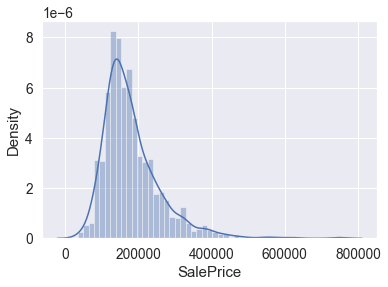

In [41]:
# Check if target variable is normally distributed

sns.distplot(raw_data_df['SalePrice'])
plt.show()

In [42]:
# Skewness

print(f"Skewness : {raw_data_df['SalePrice'].skew()}")

# Kurtosis

print(f"Kurtosis : {raw_data_df['SalePrice'].kurt()}")

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


> #### Observation
> * As the distribution with a skewness betweeb -0.5 & 0.5 is considered as approximately similar we need to treat our data as it is well above +1, which indicated the data is highly skewes
> * Kurtosis, value tells us that the peak is highed than the usual normal distribution

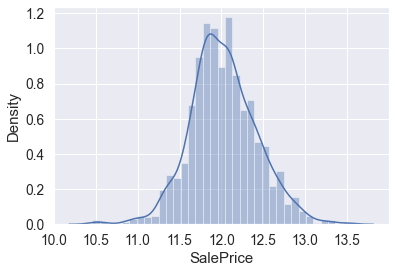

Skewness : 0.12133506220520406
Kurtosis : 0.8095319958036296


In [43]:
# Try log transform and check the distribution of data

sns.distplot(np.log(raw_data_df['SalePrice']))
plt.show()

# Skewness

print(f"Skewness : {np.log(raw_data_df['SalePrice']).skew()}")

# Kurtosis

print(f"Kurtosis : {np.log(raw_data_df['SalePrice']).kurt()}")

> The data looks failry normal distribution now, will update our treated dataframe

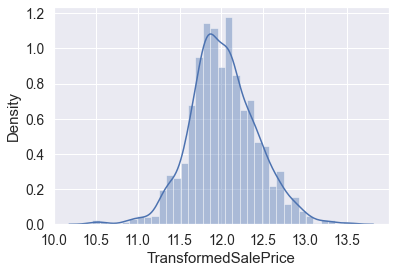

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: TransformedSalePrice, dtype: float64

In [44]:
treated_data_df['TransformedSalePrice'] = np.log(raw_data_df['SalePrice'])

sns.distplot(treated_data_df['TransformedSalePrice'])
plt.show()

treated_data_df['TransformedSalePrice'].head()

# Data Preparation & Pre-processing

In [45]:
treated_data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_YearBuilt,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold,TransformedSalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,18,18,18.0,13,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,45,45,45.0,14,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,20,19,20.0,13,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,106,51,23.0,15,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,21,21,21.0,13,12.429216


In [46]:
# Drop the columns that are redundant at this point

treated_data_df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'Id', 'SalePrice'], inplace=True, axis=1)
treated_data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age_YearBuilt,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold,TransformedSalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,18,18,18.0,13,12.247694
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,45,45,45.0,14,12.109011
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,20,19,20.0,13,12.317167
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,106,51,23.0,15,11.849398
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,21,21,21.0,13,12.429216


In [47]:
# Create Dummy Values for categorical variables

treated_data_df = pd.get_dummies(treated_data_df, cat_col, drop_first=True)

In [48]:
treated_data_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_YearBuilt,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold,TransformedSalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,18,18,18.0,13,12.247694,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,45,45,45.0,14,12.109011,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2

In [49]:
# Seperate target and dependent variables
Y = treated_data_df.pop('TransformedSalePrice')
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: TransformedSalePrice, dtype: float64

In [50]:
# Split the data in train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(treated_data_df, Y, train_size=0.7, test_size=0.3, random_state=40)

In [51]:
num_col.remove('SalePrice')

# Scale the dependent variables

scaler = MinMaxScaler().fit(X_train[num_col])

# Transforming the training data
X_train[num_col] = scaler.transform(X_train[num_col])

# Transforming the testing dataabs
X_test[num_col] = scaler.transform(X_test[num_col])

In [52]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_YearBuilt,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
498,0.000000,0.207668,0.029579,0.444444,0.75,0.055625,0.079731,0.0,0.177226,0.141408,0.129647,0.000000,0.0,0.106443,0.000000,0.0,0.333333,0.0,0.500000,0.333333,0.3,0.000000,0.25,0.203103,0.074679,0.000000,0.000000,0.0,0.0,0.0,0.0,6,54,17,54.0,12,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0.176471,0.162939,0.021720,0.666667,0.50,0.000000,0.000000,0.0,0.407534,0.155810,0.157871,0.364165,0.0,0.271289,0.000000,0.0,0.666667,0.0,0.333333,0.666667,0.6,0.666667,0.50,0.330042,0.105018,0.000000,0.371377,0.0,0.0,0.0,0.0,4,90,71,90.0,13,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,

# Model Building

## Ridge Regression

In [53]:
# List of alphas

params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
              1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]
}

In [54]:
# Train and use crossvalidation for hyperparameter tuning

ridge = Ridge()

folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1
                       )

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010908,0.002546,0.004385,0.000958,0.0001,{'alpha': 0.0001},-0.091151,-0.110097,-0.123225,-0.106728,-0.104631,-0.107166,0.010292,23,-0.064460,-0.063820,-0.061300,-0.063714,-0.060727,-0.062804,0.001495
1,0.008785,0.000599,0.003851,0.000505,0.001,{'alpha': 0.001},-0.090987,-0.110178,-0.122089,-0.104644,-0.103450,-0.106270,0.010096,22,-0.064614,-0.063845,-0.061397,-0.063804,-0.060841,-0.062900,0.001493
2,0.009706,0.001851,0.004280,0.000585,0.01,{'alpha': 0.01},-0.091188,-0.110366,-0.117039,-0.099705,-0.101741,-0.104008,0.008925,20,-0.065895,-0.064016,-0.062396,-0.064517,-0.061836,-0.063732,0.001467
3,0.008768,0.000875,0.003147,0.000501,0.05,{'alpha': 0.05},-0.093292,-0.109631,-0.112595,-0.099638,-0.103004,-0.103632,0.006922,17,-0.069161,-0.064490,-0.065612,-0.066807,-0.065021,-0.066218,0.001661
4,0.008388,0.000859,0.003676,0.000511,0.1,{'alpha': 0.1},-0.094545,-0.108678,-0.111007,-0.100825,-0.103916,-0.103794,0.005835,19,-0.071190,-0.065003,-0.067686,-0.068282,-0.067042,-0.067841,0.002006


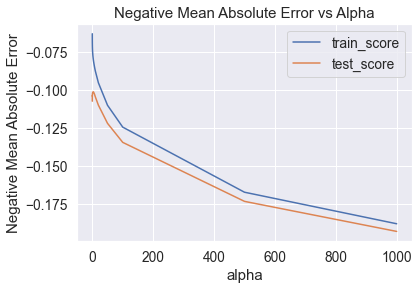

In [56]:
# Plot mean test and train scores with different alphas

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='upper right')
plt.show()

> #### Observation
> * From the above graph we can tell that the optimal value of alpha is somewhere near 100 so we will create a final model with alpha = 50

In [57]:
alpha = 50
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-4.47056096e-02,  1.71147879e-02,  2.53998147e-02,  1.30518691e-01,
        5.18668814e-02,  3.23772107e-02,  2.57867686e-02,  1.87890874e-02,
        4.49135171e-02,  4.55243229e-02,  7.16655526e-02,  7.88165953e-02,
        1.70946395e-02,  9.13437983e-02,  4.58436527e-02, -1.94881757e-03,
        8.01730443e-02,  3.98104915e-02,  6.20684421e-02,  3.54533751e-03,
        1.18101449e-01,  5.40226465e-02,  9.09792742e-02,  7.41803942e-02,
        5.24979342e-02,  1.97361904e-02,  1.27563229e-02,  6.65709584e-03,
        3.42757763e-02,  6.31684673e-03, -2.22343111e-03,  1.84324643e-03,
       -1.26607848e-03, -2.58874975e-03,  2.29062877e-04,  7.11268720e-03,
        1.37875764e-02,  1.35285926e-02,  5.05268885e-02, -4.17456672e-02,
        1.27700544e-02, -7.51987982e-03,  1.44090961e-02,  3.31315885e-02,
       -1.54868354e-02, -1.60625949e-02,  1.36718500e-02,  5.83414634e-03,
        4.90588770e-03,  0.00000000e+00,  3.10560834e-02, -2.29267431e-02,
       -4.31745782e-03, -

## Lasso Regression

In [58]:
# Train and use crossvalidation for hyperparameter tuning

lasso = Lasso()

folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1
                       )

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075253,0.021335,0.003923,0.001034,0.0001,{'alpha': 0.0001},-0.087068,-0.100894,-0.101944,-0.097643,-0.101816,-0.097873,0.005622,1,-0.073913,-0.068235,-0.069602,-0.071039,-0.069075,-0.070373,0.001991
1,0.014276,0.000989,0.003042,0.000516,0.001,{'alpha': 0.001},-0.092482,-0.095853,-0.109905,-0.098072,-0.102210,-0.099704,0.006000,2,-0.090281,-0.083208,-0.085118,-0.089095,-0.088726,-0.087286,0.002670
2,0.008296,0.001109,0.003091,0.000467,0.01,{'alpha': 0.01},-0.156562,-0.135220,-0.158231,-0.151191,-0.155598,-0.151361,0.008399,3,-0.147156,-0.143651,-0.138794,-0.148106,-0.144186,-0.144379,0.003267
3,0.006721,0.000968,0.003230,0.000502,0.05,{'alpha': 0.05},-0.228206,-0.198252,-0.220843,-0.226083,-0.229316,-0.220540,0.011518,4,-0.214828,-0.219973,-0.217446,-0.215519,-0.218186,-0.217190,0.001853
4,0.006804,0.000897,0.003769,0.000230,0.1,{'alpha': 0.1},-0.245365,-0.212901,-0.237644,-0.242264,-0.246848,-0.237004,0.012457,7,-0.232156,-0.239223,-0.232656,-0.233095,-0.231951,-0.233816,0.002732


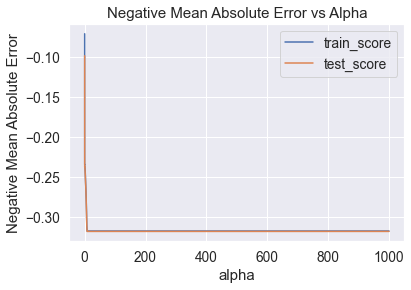

In [60]:
# Plot mean test and train scores with different alphas

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='upper right')
plt.show()

> #### Observation
> * From above graph we cannot choose a value of alpha, let's restrict the values for alpha and retrain a new model

In [61]:
# List of new alphas

params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
              1.0]
}

In [62]:
# Train a lasso model

lasso_model2_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1
                       )

lasso_model2_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
cv_results = pd.DataFrame(lasso_model2_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073753,0.021166,0.003748,0.000705,0.0001,{'alpha': 0.0001},-0.087068,-0.100894,-0.101944,-0.097643,-0.101816,-0.097873,0.005622,1,-0.073913,-0.068235,-0.069602,-0.071039,-0.069075,-0.070373,0.001991
1,0.014023,0.000987,0.003553,0.000628,0.001,{'alpha': 0.001},-0.092482,-0.095853,-0.109905,-0.098072,-0.102210,-0.099704,0.006000,2,-0.090281,-0.083208,-0.085118,-0.089095,-0.088726,-0.087286,0.002670
2,0.008216,0.001311,0.003466,0.000497,0.01,{'alpha': 0.01},-0.156562,-0.135220,-0.158231,-0.151191,-0.155598,-0.151361,0.008399,3,-0.147156,-0.143651,-0.138794,-0.148106,-0.144186,-0.144379,0.003267
3,0.007564,0.000575,0.003651,0.000541,0.05,{'alpha': 0.05},-0.228206,-0.198252,-0.220843,-0.226083,-0.229316,-0.220540,0.011518,4,-0.214828,-0.219973,-0.217446,-0.215519,-0.218186,-0.217190,0.001853
4,0.006641,0.001181,0.003283,0.000607,0.1,{'alpha': 0.1},-0.245365,-0.212901,-0.237644,-0.242264,-0.246848,-0.237004,0.012457,7,-0.232156,-0.239223,-0.232656,-0.233095,-0.231951,-0.233816,0.002732


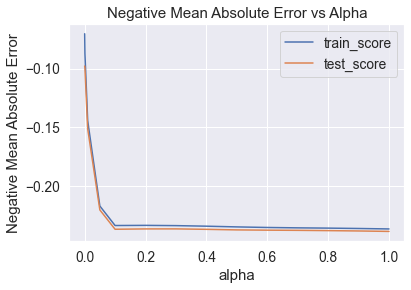

In [64]:
# Plot mean test and train scores with different alphas

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='upper right')
plt.show()

> # Observation
> * Here we can see that 0.001 is the best value for alpha

In [65]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-4.48438245e-02, -0.00000000e+00,  0.00000000e+00,  5.95280510e-01,
        2.08479870e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.17516866e-01,  1.11612592e-01,  0.00000000e+00,
        4.77262684e-02,  5.40520631e-03,  5.72884396e-03, -0.00000000e+00,
        1.87600058e-01,  0.00000000e+00,  2.57732535e-01,  0.00000000e+00,
        8.54911379e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.75083030e-02, -0.00000000e+00, -0.00000000e+00, -2.75578301e-04,
       -1.78822403e-03, -1.35282879e-03,  3.68189437e-04,  4.05509373e-03,
        7.51156085e-03,  0.00000000e+00,  2.42961127e-02, -5.16148187e-02,
        0.00000000e+00, -0.00000000e+00,  3.34050957e-03,  3.26197756e-02,
       -0.00000000e+00, -4.99435907e-03,  0.00000000e+00,  0.00000000e+00,
        1.75713488e-02,  0.00000000e+00,  3.87020693e-02, -3.33536677e-03,
       -0.00000000e+00, -

# Model Interpretation & Comparision

## Important Predictors


In [66]:
# create a dataframe with the feature and their corrosponding coeff value, for ridge regression

coeff = pd.DataFrame(ridge.coef_, columns=['Importance/ Coeff Value'])
col_name = pd.DataFrame(X_train.columns, columns=['Feature'])
feature_importance_ridge = pd.concat([col_name, coeff], axis=1)
feature_importance_ridge.head()

,Feature,Importance/ Coeff Value
0,MSSubClass,-0.044706
1,LotFrontage,0.017115
2,LotArea,0.025400
3,OverallQual,0.130519
4,OverallCond,0.051867


In [67]:
# Top features with positive coeff

feature_importance_ridge.sort_values('Importance/ Coeff Value', ascending=False).head()

,Feature,Importance/ Coeff Value
3,OverallQual,0.130519
20,TotRmsAbvGrd,0.118101
13,GrLivArea,0.091344
22,GarageCars,0.090979
16,FullBath,0.080173


In [68]:
# Top features with negetive coeff

feature_importance_ridge.sort_values('Importance/ Coeff Value', ).head()

,Feature,Importance/ Coeff Value
211,FireplaceQu_None,-0.068097
202,KitchenQual_TA,-0.062291
63,Neighborhood_Gilbert,-0.059595
62,Neighborhood_Edwards,-0.058008
98,BldgType_TwnhsE,-0.050424


In [69]:
# create a dataframe with the feature and their corrosponding coeff value, for ridge regression

coeff = pd.DataFrame(lasso.coef_, columns=['Importance/ Coeff Value'])
col_name = pd.DataFrame(X_train.columns, columns=['Feature'])
feature_importance_ridge = pd.concat([col_name, coeff], axis=1)
feature_importance_ridge.head()

,Feature,Importance/ Coeff Value
0,MSSubClass,-0.044844
1,LotFrontage,-0.000000
2,LotArea,0.000000
3,OverallQual,0.595281
4,OverallCond,0.208480


In [70]:
# Top features with positive coeff

feature_importance_ridge.sort_values('Importance/ Coeff Value', ascending=False)[5:10]

,Feature,Importance/ Coeff Value
71,Neighborhood_NridgHt,0.136569
77,Neighborhood_StoneBr,0.129443
61,Neighborhood_Crawfor,0.123351
14,BsmtFullBath,0.111613
70,Neighborhood_NoRidge,0.096708


In [71]:
# Top features with negetive coeff

feature_importance_ridge.sort_values('Importance/ Coeff Value', ).head()

,Feature,Importance/ Coeff Value
173,BsmtExposure_None,-0.097117
97,BldgType_Twnhs,-0.064742
211,FireplaceQu_None,-0.061766
62,Neighborhood_Edwards,-0.055161
39,MSZoning_RM,-0.051615


## RSS MSE & RMSE

In [72]:
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

print('===FOR RIDGE===')
r2 = r2_score(y_train, y_pred_ridge) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_train - y_pred_ridge))
print(f'RSS: {rss}')
mse = mean_squared_error(y_train, y_pred_ridge)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

print()

print('===FOR LASSO===')
r2 = r2_score(y_train, y_pred_lasso) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_train - y_pred_lasso))
print(f'RSS: {rss}')
mse = mean_squared_error(y_train, y_pred_lasso)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

===FOR RIDGE===
r2: 0.8663772857412035
RSS: 22.75021275042988
MSE: 0.022282284770254537
RMSE: 0.1492725184695915

===FOR LASSO===
r2: 0.9011283670195165
RSS: 16.833595229415437
MSE: 0.016487360655646852
RMSE: 0.12840311778008684


### Testing Model on Unseen Data

In [73]:
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print('===FOR RIDGE===')
r2 = r2_score(y_test, y_pred_ridge) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_test - y_pred_ridge))
print(f'RSS: {rss}')
mse = mean_squared_error(y_test, y_pred_ridge)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

print()

print('===FOR LASSO===')
r2 = r2_score(y_test, y_pred_lasso) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_test - y_pred_lasso))
print(f'RSS: {rss}')
mse = mean_squared_error(y_test, y_pred_lasso)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

===FOR RIDGE===
r2: 0.8369319466918972
RSS: 10.189100823674817
MSE: 0.023262787268663966
RMSE: 0.15252143216172592

===FOR LASSO===
r2: 0.8874511025907018
RSS: 7.032475337950146
MSE: 0.016055879767009465
RMSE: 0.1267117980576768


> #### Observation
> * We can see that the Lasso models performs marginally well compared to ridge regression
> * The performance drop from train to test data is less in lasso as well, indicating it is more robust model

### For Double alpha value

In [74]:
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [75]:
# Train Data

y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

print('===FOR RIDGE===')
r2 = r2_score(y_train, y_pred_ridge) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_train - y_pred_ridge))
print(f'RSS: {rss}')
mse = mean_squared_error(y_train, y_pred_ridge)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

print()

print('===FOR LASSO===')
r2 = r2_score(y_train, y_pred_lasso) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_train - y_pred_lasso))
print(f'RSS: {rss}')
mse = mean_squared_error(y_train, y_pred_lasso)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

===FOR RIDGE===
r2: 0.8323919735389549
RSS: 28.53645266689707
MSE: 0.0279495128960794
RMSE: 0.16718107816400576

===FOR LASSO===
r2: 0.8825713977206918
RSS: 19.9930505802011
MSE: 0.01958183210597561
RMSE: 0.13993509962113013


In [76]:
# Test Data

y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print('===FOR RIDGE===')
r2 = r2_score(y_test, y_pred_ridge) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_test - y_pred_ridge))
print(f'RSS: {rss}')
mse = mean_squared_error(y_test, y_pred_ridge)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

print()

print('===FOR LASSO===')
r2 = r2_score(y_test, y_pred_lasso) 
print(f'r2: {r2}')
rss = np.sum(np.square(y_test - y_pred_lasso))
print(f'RSS: {rss}')
mse = mean_squared_error(y_test, y_pred_lasso)
print(f'MSE: {mse}')
rmse = mse**0.5
print(f'RMSE: {rmse}')

===FOR RIDGE===
r2: 0.8071938590394413
RSS: 12.047247574354742
MSE: 0.027505131448298498
RMSE: 0.16584671069484164

===FOR LASSO===
r2: 0.8703065996240935
RSS: 8.103727896343717
MSE: 0.01850166186379844
RMSE: 0.13602081408298672
